In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.stats import zscore

import matplotlib.pyplot as plt
%matplotlib inline

PCA and Linear regression do different things.
But PCA with one component is kind of like linear regression.

Why should we bother with linear regression when we just do one component pca?

**The prediction of the $y$-variable(s) will be better using linear regression than it would be using pca.**


There are a few ways to think about this:

### 1) How we measure errors

PCA treats all variables identically, and so when it measures the distance from a sample to the line, it measures the "diagonal distance".  Linear regression cares about the "vertical" distance from the line to the variables y that we want to predict.

### 2) How PCA prioritizes variables 

The diagonal distance might be very different from the "vertical" distance in some cases.  This is as if PCA "prioritizes" some variables more than others.  If those variables are our $X$'s not our $y$'s, then the results of PCA and linear regression could be very different.  (See below for an example).

### Lots of dimensions

The two problems above get worse when there are many variables - the differe







This notebook runs linear regression and PCA using the same 2d data.

What happens if you change the data?

Can you come up with some data that would make the results as different as possible?

In [2]:
n1 = np.array([5,-4,8,-10,1,0])
n2 = np.array([7,-2,7,-9,0,-3])

A = np.concatenate((n1[np.newaxis,:], n2[np.newaxis,:]))

print('covariance matrix')
covA = A @ A.T / A.shape[1]
print('[[ %2.1f, %2.f ],\n [ %2.1f, %2.1f ]]'%(covA[0,0],covA[0,1],covA[1,0],covA[1,1]))

# find eigenvalues and eigenvectors of covariance matrix
lam, v = np.linalg.eig( covA )

print( 'eigenvalues: %2.1f, %2.1f'%(lam[0],lam[1]))
print( 'eigenvectors: [%2.2f,%2.2f], [%2.2f,%2.2f]'%(v[0,0],v[1,0],v[0,1],v[1,1]))

covariance matrix
[[ 34.3, 32 ],
 [ 31.5, 32.0 ]]
eigenvalues: 64.7, 1.6
eigenvectors: [0.72,0.69], [-0.69,0.72]


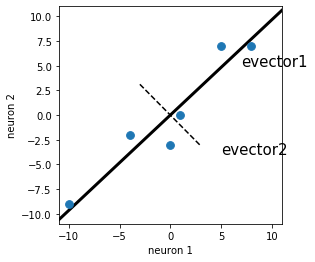

In [3]:
# plot neuron activity with eigenvectors
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(n1,n2,s=60)
ax.plot( np.array([-11,11]), np.array([-11,11])*v[1,0]/v[0,0], color='k', zorder=0, lw=3 )
ax.plot( np.array([-3,3]), np.array([-3,3])*v[1,1]/v[0,1], '--', color='k', zorder=0 )
ax.text( 7,  5, 'evector1',fontsize=15)
ax.text( 5, -4, 'evector2',fontsize=15)
ax.set_xlabel('neuron 1')
ax.set_ylabel('neuron 2')
ax.set_xlim(-11,11)
ax.set_ylim(-11,11)
plt.show()

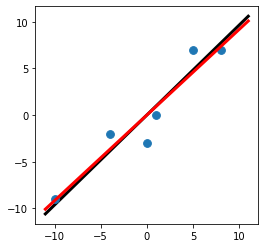

In [4]:
reg = LinearRegression().fit(n1.reshape(-1, 1), n2)
lr_xcoords = np.array([-11,11])
lr_ycoords = reg.coef_[0] * lr_xcoords + reg.intercept_

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(n1,n2,s=60)
ax.plot( np.array([-11,11]), np.array([-11,11])*v[1,0]/v[0,0], color='k', zorder=0, lw=3 )
ax.plot( lr_xcoords, lr_ycoords, color='r', lw=3 )

# So they're basically the same for these data

In [5]:
# The normal equation breaking example

xnasty = np.array([0,0,0]).reshape(-1,1)
ynasty = np.array([0,1,2]).reshape(-1,1)

# pca matrix should be size (nsamples, nfeatures)
pcaX = np.concatenate( (xnasty, ynasty ), axis=1)

pca = PCA()
pca.fit( pcaX )
V = pca.components_
print( 'pca: :', V[:,0] )

reg = LinearRegression().fit(xnasty, ynasty )
print( 'intercept = %f . slope = %f ' % (reg.intercept_, reg.coef_[0],  ))

pca: : [-0.  1.]
intercept = 1.000000 . slope = 0.000000 


In [6]:
def plotLr( x, y, ax ):
    reg = LinearRegression().fit(x, y)
    lr_xcoords = np.array([np.min(x),np.max(x)])
    lr_ycoords = reg.coef_[0] * lr_xcoords + reg.intercept_
    ax.plot( lr_xcoords, lr_ycoords, color='r', lw=3 )
    
def plotPca( x, y, ax ):    
    xm = np.mean(x)
    ym = np.mean(y)
    mnvec = np.array( [xm, ym ])

    pcaDatMtx = np.concatenate( (x - xm, y - ym), axis=1)

    pca = PCA(n_components=1)
    pca.fit( pcaDatMtx )

    # The principal component
    V = pca.components_

    # the singular values (how important each pc is)
    sv = pca.singular_values_

    # represent inputs as linear combination of pcs
    U = pcaDatMtx @ V.T 

    # Reconstruct data from the pcs
    # Add the mean back in
    datRecon = (U @ V) + mnvec

    # print( datRecon )
    # print( ' ')
    # print( pcaDatMtx)
    # print( ' ' )
    p1 = datRecon[ np.argmin( datRecon[:,0]), : ]
    p2 = datRecon[ np.argmax( datRecon[:,0]), : ]
    # print( p1 )
    # print( p2 )
    ax.plot( [p1[0], p2[0]], [p1[1], p2[1]], color='k', zorder=0, lw=3 )


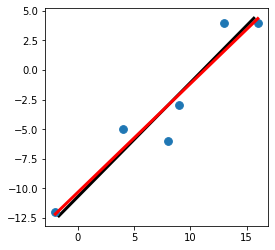

In [7]:
x = n1.reshape(-1,1) + 8 
y = n2.reshape(-1,1) - 3

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(x,y,s=60)
plotPca( x, y, ax )
plotLr( x, y, ax )

In [8]:
# Play!

In [89]:
def predictPCA( X, y ):
    
    Xy = np.concatenate( [X, y[:,np.newaxis]], axis=1)
    xymn = np.mean(Xy,axis=0)
    ymn = np.mean(y)
    pcaDatMtx = Xy - xymn

    pca = PCA(n_components=1)
    pca.fit( pcaDatMtx )

    # The principal component
    V = pca.components_

    # represent inputs as linear combination of pcs
    U = pcaDatMtx @ V.T 
    
    # Reconstruct data from the pcs
    # Add the mean back in
    recon = (U @ V)[:,-1]
    yhat = recon + ymn
    err = np.linalg.norm( y - yhat )
    
    return err, yhat, (V, U, xymn)
    
def predictLr( X, y ):
    reg = LinearRegression().fit( X, y )
    reg.fit( X, y )
    yhat = reg.predict( X )
    err = np.linalg.norm( y - yhat )

    return err, yhat, reg

In [93]:
# Make a frisbee/pancake shaped distribution of 3 variables
# where x1, and x2, have relatively high variance.
# and a third variable y, has a relatively low variance
# 
# It's also the case that x1 and x2 give information about y
# i.e. that x1 and y are correlated, and x2 and y are correlated
# but x1 and x2 are uncorrelated

N = 1000 # number of observations
x1stddev = 10
x2stddev = 10
ystddev  = 0.1

x1 = x1stddev * np.random.randn( N )
x2 = x2stddev * np.random.randn( N ) + ( 4 * x1 )
y  =  ystddev * np.random.randn( N ) + (0.2 * x1) + (0.3 * x2) 

X = np.concatenate( [x1[:,np.newaxis], x2[:,np.newaxis]], axis=1)

err_lr,  yhat_lr,  lr  = predictLr( X, y )
err_pca, yhat_pca, pca = predictPCA( X, y )

print( 'pca error : ', err_pca)
print( 'lr  error : ', err_lr)

pca error :  9.046447239055027
lr  error :  3.114571496099753


Text(0.5, 1.0, 'points above the line have PCA error > regression error')

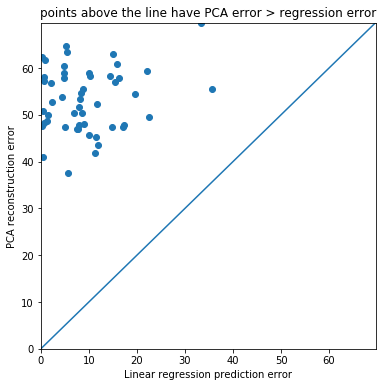

In [150]:
# The effect can be especially pronounced when we have a very high number
# of dimensions.
#
# I'm not carefully designing the correlations so that it will produce a bad result.
# A medium-sized (25-D) dataset whose variables are randomly correlated has a 
# high likelihood that the best single projection (PCA) will poorly predict
# any one of those variables

# We'll repeat the experiment below many times
nExperiments = 50

pcaErrs = []
lrErrs = []
for i in range(nExperiments):
    D = 25 # dimensionality
    N = 1000 # number of observations
    tmp = np.random.rand( D, D ) + np.identity( D )

    # build a symmetric 
    correlationMtx = tmp.T @ tmp 
    mean = np.zeros( D )

    Xy = np.random.multivariate_normal(mean, correlationMtx, N )
    X = Xy[:,:-1] # omit the last column
    y = Xy[:,-1]  # the last column - predict this from X

    err_lr,  yhat_lr,  lr  = predictLr( X, y )
    err_pca, yhat_pca, pca = predictPCA( X, y )

    lrErrs += [err_lr]
    pcaErrs += [err_pca]

maxerr = np.max( [np.max( pcaErrs ), np.max(lrErrs)])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot([0,maxerr],[0,maxerr,]) 
ax.scatter( lrErrs, pcaErrs )
ax.set_xlim(0,maxerr)
ax.set_ylim(0,maxerr)
ax.set_xlabel('Linear regression prediction error')
ax.set_ylabel('PCA reconstruction error')
ax.set_title('points above the line have PCA error > regression error')